In [52]:
from IPython.display import Image 

### Problem statement: 
- To build a CNN-based model that can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Problem Background
- melanoma is otherwise called malignant melanoma. It is a type of skin cancer that develops from the pigment-producing cells known as melanocytes. Melanomas typically occur in the skin but may rarely occur in the mouth, intestines or eye (uveal melanoma)
- Symptoms might include a new, unusual growth or a change in an existing mole. Melanomas can occur anywhere on the body.- Treatment may involve surgery, radiation, medication or in some cases, chemotherapy.



### Importing Skin Cancer Data
#### Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:

data_dir_train = pathlib.Path("D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path("D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")


In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
## Write train dataset here using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure to resize images to the size img_height*img_width while writing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split= 0.2,subset= 'training',image_size=(img_height,img_width),batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
## Write your validation dataset here using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure to resize  images to the size img_height*img_width while writing the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split= 0.2,subset= 'validation',image_size=(img_height,img_width),batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
# List out all the skin cancer classes and store them in a list. 
# find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


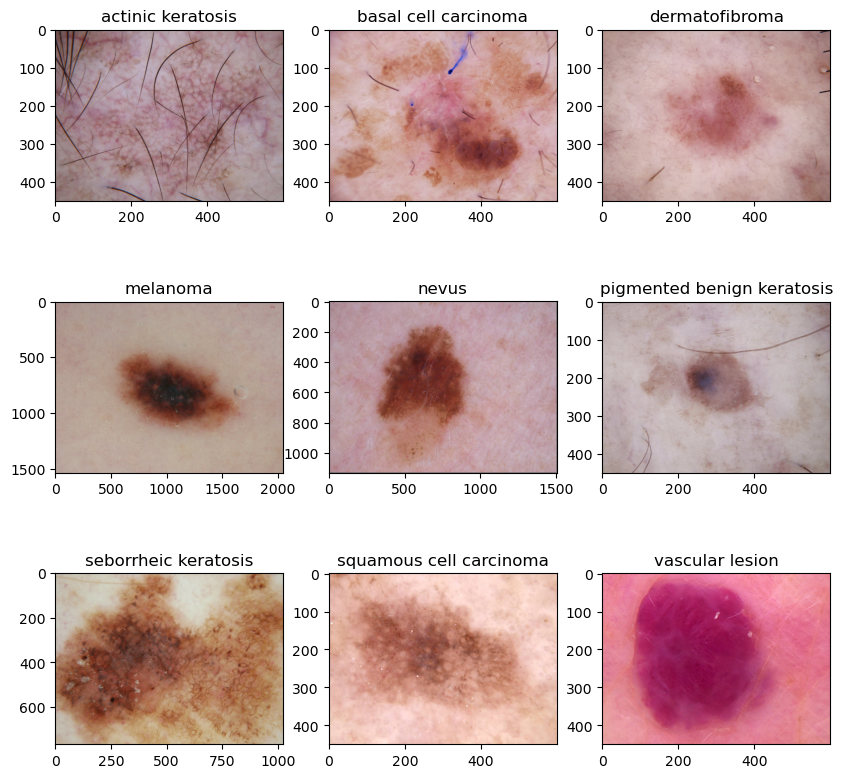

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

 - Prefetching of images is used to prepare the environment for training and ensuring images are taken from the disk without having I/O blocked while autotuning of images in batches is to prevent the large dataset from becoming a bottleneck while training the model.


In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

### Training the Model with CNN
- There are three types of layers in CNN which are convolutional, pooling, and fully connected layers with additional layers of dropout for reducing the overfitting of models and finally the activation layer for adding non-linearity to the model. More on CNN can be found here.
- There are two main parts to a CNN architecture
- (1) 
A convolution tool that separates and identifies the various features of the image for analysis in a process called as Feature Extraction. 
The network of feature extraction consists of many pairs of convolutional or pooling layers. 
A fully connected layer that utilizes the output from the convolution process and predicts the class of the image based on the features extracted in previous stag
- (2) es.
This CNN model of feature extraction aims to reduce the number of features present in a dataset. It creates new features which summarises the existing features contained in an original set of features. There are many CNN layers as shown in the CNN architecture dia
 gram.

In [53]:
Image(url="https://miro.medium.com/v2/resize:fit:640/format:webp/1*tvwYybdIwvoOs0DuUEJJTg.png", width=800, height=300) 


In [16]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### View the Summary of all layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

In [19]:
epochs = 30
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30



C:\Users\My-PC\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



56/56 [==============================] - 12s 181ms/step - loss: 2.0487 - accuracy: 0.2093 - val_loss: 2.0529 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 10s 173ms/step - loss: 2.0277 - accuracy: 0.2081 - val_loss: 2.0121 - val_accuracy: 0.2931
Epoch 3/30
56/56 [==============================] - 10s 172ms/step - loss: 2.0029 - accuracy: 0.2383 - val_loss: 2.0049 - val_accuracy: 0.2483
Epoch 4/30
56/56 [==============================] - 10s 172ms/step - loss: 1.9518 - accuracy: 0.2506 - val_loss: 1.9179 - val_accuracy: 0.2461
Epoch 5/30
56/56 [==============================] - 10s 173ms/step - loss: 1.9345 - accuracy: 0.2567 - val_loss: 1.8635 - val_accuracy: 0.2931
Epoch 6/30
56/56 [==============================] - 10s 173ms/step - loss: 1.8621 - accuracy: 0.2829 - val_loss: 1.7942 - val_accuracy: 0.3244
Epoch 7/30
56/56 [==============================] - 10s 174ms/step - loss: 1.7516 - accuracy: 0.3477 - val_loss: 1.7450 - val_accuracy: 0.3557
Epoch 8/3

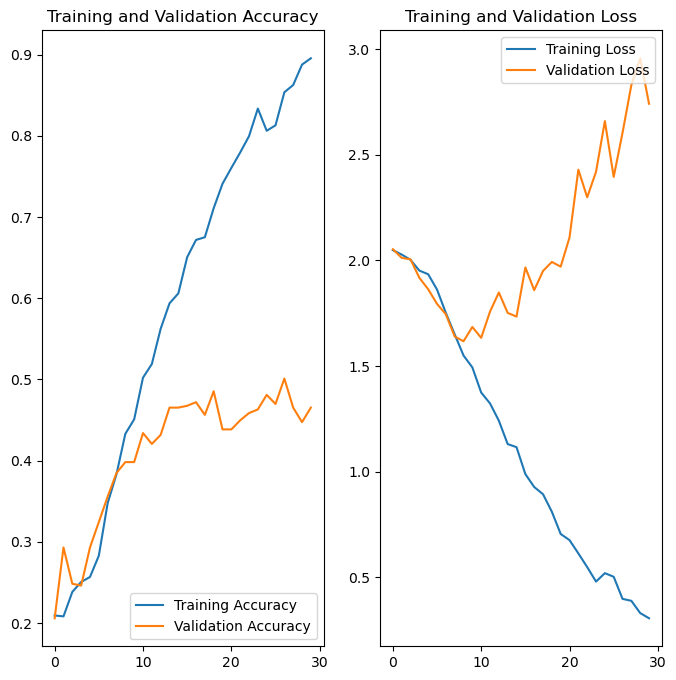

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finding on the first base model**

- The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

- The accuracy is just around 75-80% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate


In [21]:
# we have analysed the model fit history for the presence of underfit or overfit, choose an appropriate data augmentation strategy. 
data_augument = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')])

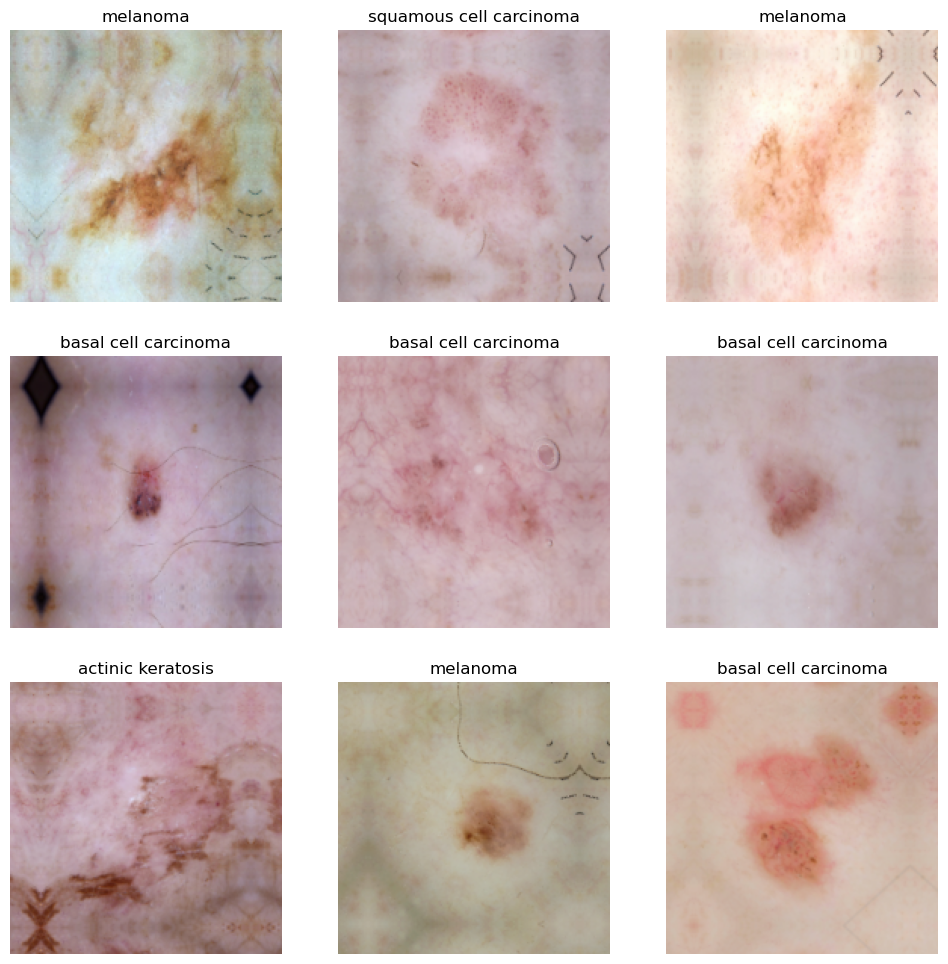

In [22]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Create the model, compile and train the model

In [23]:
# use the Dropout layer if there is evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [25]:
# train model for 20 epochs
epochs=20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 13s 217ms/step - loss: 2.0552 - accuracy: 0.1786 - val_loss: 2.0461 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 12s 213ms/step - loss: 1.9956 - accuracy: 0.2467 - val_loss: 1.9233 - val_accuracy: 0.2528
Epoch 3/20
56/56 [==============================] - 12s 216ms/step - loss: 1.8560 - accuracy: 0.3387 - val_loss: 1.8084 - val_accuracy: 0.3423
Epoch 4/20
56/56 [==============================] - 12s 217ms/step - loss: 1.7328 - accuracy: 0.3878 - val_loss: 1.8362 - val_accuracy: 0.2931
Epoch 5/20
56/56 [==============================] - 12s 216ms/step - loss: 1.6999 - accuracy: 0.3700 - val_loss: 1.6123 - val_accuracy: 0.4251
Epoch 6/20
56/56 [==============================] - 12s 217ms/step - loss: 1.5860 - accuracy: 0.4208 - val_loss: 1.7319 - val_accuracy: 0.3848
Epoch 7/20
56/56 [==============================] - 12s 218ms/step - loss: 1.5818 - accuracy: 0.4386 - val_loss: 1.4738 - val_accuracy: 0.4944

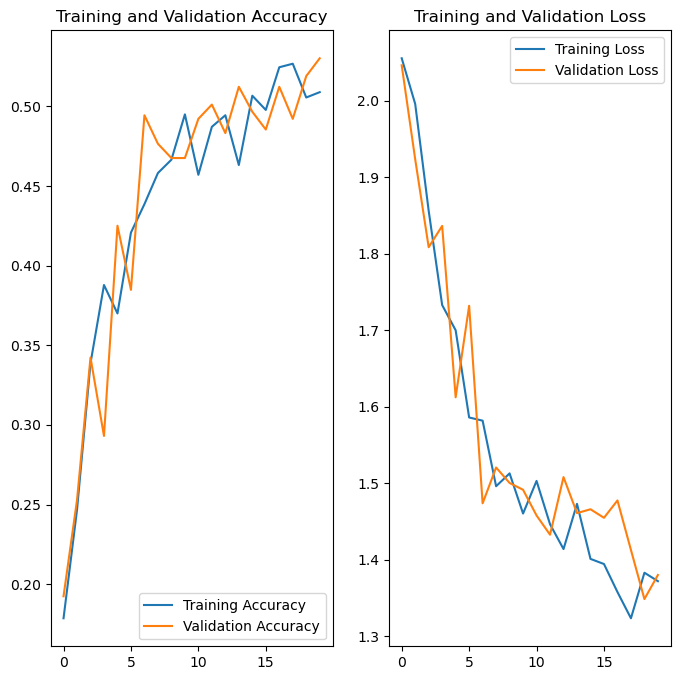

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, and see if there is evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**
- There is no improvement in accuracy but I can see the overfitting problem has been solved due to data augmentation 
- I can increase the epochs to increase the accuracy so it's too early for judgment 

#### Find the distribution of classes in the training dataset.
**Context:** 
- Many times real-life datasets can have a class imbalance, one class can have a proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check, it becomes important to check what is the distribution of classes in the data.

In [27]:
path_list=[]
lesion_list=[]
for i in class_names:  
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
1,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
2,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
3,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
4,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
...,...,...
2234,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2235,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2236,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2237,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion


In [28]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
1,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
2,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
3,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
4,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
...,...,...
2234,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2235,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2236,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2237,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion


<BarContainer object of 9 artists>

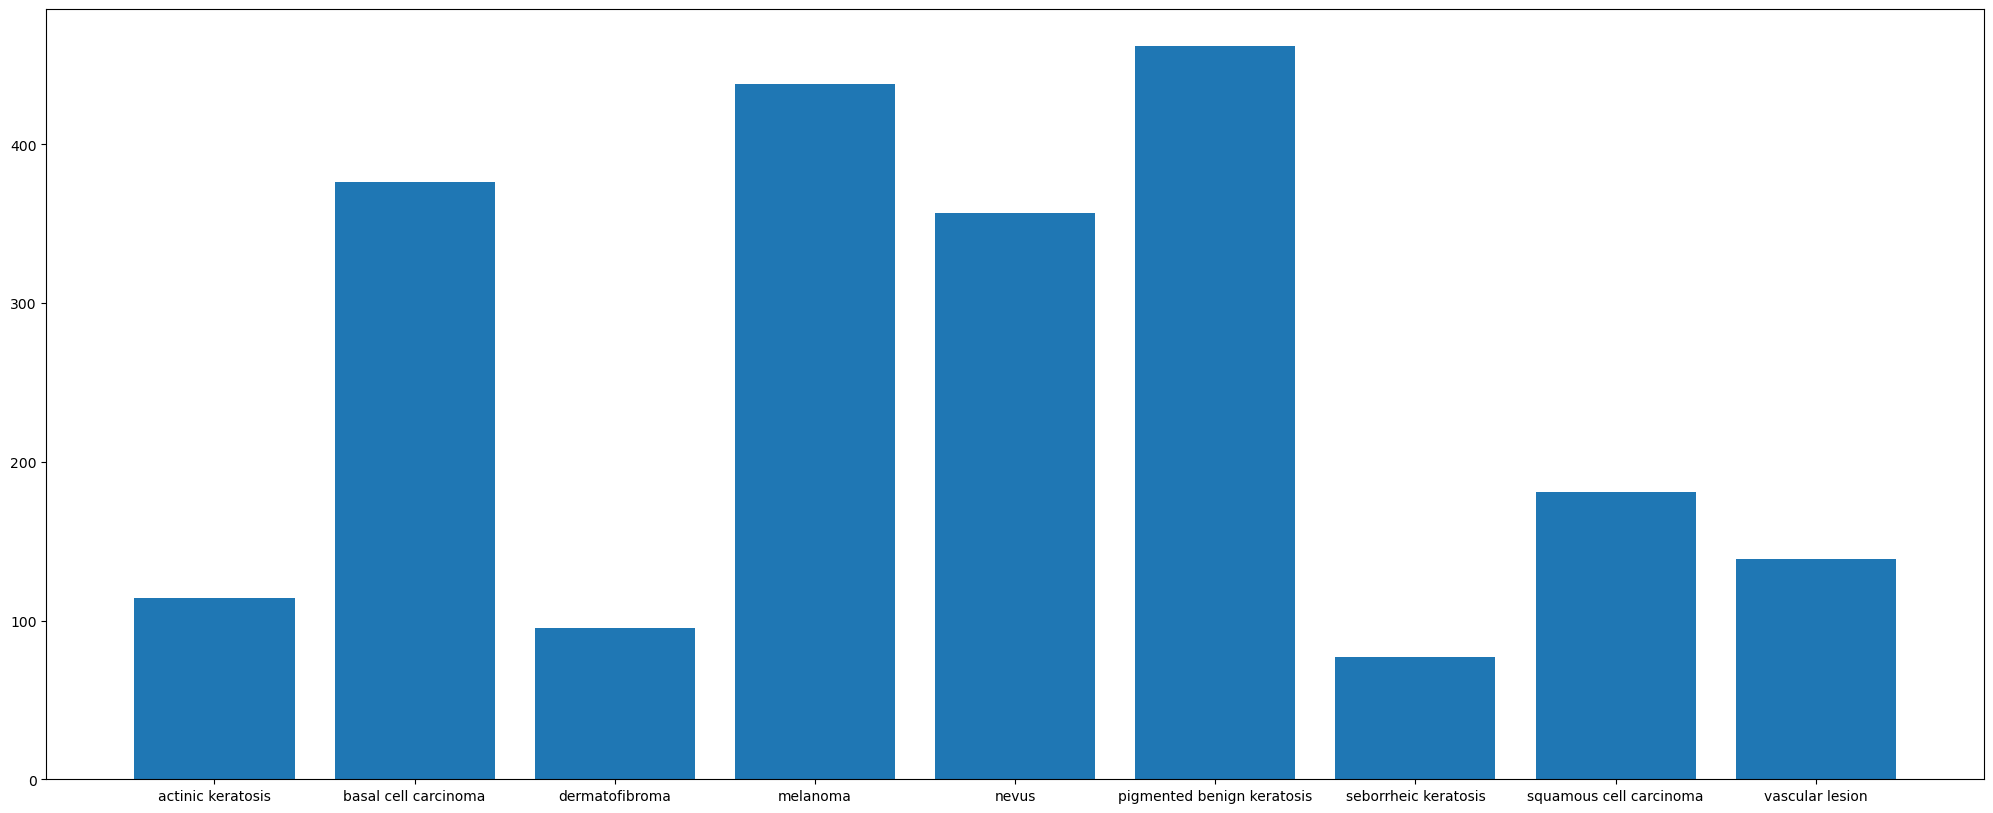

In [29]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### Write your findings here: 
- Which class has the least number of samples?
- Which classes dominate the data in terms of proportionate number of samples?

In [30]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Rectify the class imbalance
**Context:** 
- I can use a Python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:
1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.

In [32]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DBD2D014D0>: 100%|█| 500/500 [00:01<00:00, 348.65 Samples


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DBD2D10990>: 100%|█| 500/500 [00:01<00:00, 327.71 Sample


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1DB46822050>: 100%|█| 500/500 [00:01<00:00, 389.39 Sampl


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1DB469C1D90>: 100%|█| 500/500 [00:01<00:


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DB469A2FD0>: 100%|█| 500/500 [00:01<00:00, 348.35 Samples


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1DB469F1DD0>: 100%|█| 500/500 [00:01<00:


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DB305E2B50>: 100%|█| 500/500 [00:01<00:00, 408.78 Sample


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DB3054B4D0>: 100%|█| 500/500 [00:01<00:00, 383.98 Sample


Initialised with 2239 image(s) found.
Output directory set to D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x1DB33E624D0>: 100%|█| 500/500 [00:01<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
data_dir_train1 = pathlib.Path("D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [36]:
for i in class_names:
      for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
1,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
2,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
3,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
4,D:\Made Easy Book\CNN_assignment\Skin cancer I...,actinic keratosis
...,...,...
2234,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2235,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2236,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion
2237,D:\Made Easy Book\CNN_assignment\Skin cancer I...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

In [39]:
import pathlib
data_dir_train1=pathlib.Path("D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")

In [40]:
data_dir_train1

WindowsPath('D:/Made Easy Book/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### Create a training dataset

In [41]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [42]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
data_dir_train1=pathlib.Path("D:\Made Easy Book\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


####  Create your model (make sure to include normalization)

In [44]:
#use the Dropout layer if there is evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 10
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

####  Compile your model (Choose optimizer and loss function appropriately)

In [45]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

####  Train your model

In [46]:
epochs = 30
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30


C:\Users\My-PC\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 37s 213ms/step - loss: 1.3711 - accuracy: 0.6628 - val_loss: 1.3542 - val_accuracy: 0.6726
Epoch 2/30
169/169 [==============================] - 36s 215ms/step - loss: 1.3293 - accuracy: 0.6660 - val_loss: 1.3264 - val_accuracy: 0.6726
Epoch 3/30
169/169 [==============================] - 37s 218ms/step - loss: 1.2978 - accuracy: 0.6664 - val_loss: 1.2916 - val_accuracy: 0.6726
Epoch 4/30
169/169 [==============================] - 37s 220ms/step - loss: 1.2574 - accuracy: 0.6660 - val_loss: 1.2676 - val_accuracy: 0.6696
Epoch 5/30
169/169 [==============================] - 38s 222ms/step - loss: 1.2159 - accuracy: 0.6632 - val_loss: 1.2356 - val_accuracy: 0.6689
Epoch 6/30
169/169 [==============================] - 38s 224ms/step - loss: 1.1962 - accuracy: 0.6612 - val_loss: 1.2065 - val_accuracy: 0.6682
Epoch 7/30
169/169 [==============================] - 38s 224ms/step - loss: 1.1703 - accuracy: 0.6641 - val_loss: 1.3192 - val_accuracy: 0.6

#### Visualize the model results

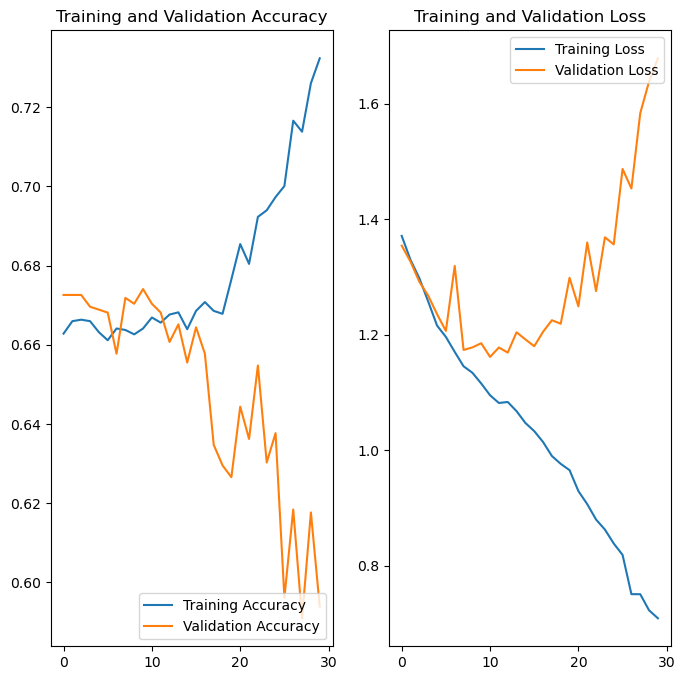

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyze your results here. 
- Questions: Did you get rid of underfitting/overfitting? Did class rebalance help?
- Answers:
- (i) Accuracy on training data has increased by using the Augmentor library
- (ii) The model is still overfitting
- (iii) The problem of overfitting can be solved by adding more layers, neurons, or dropout layers.
- (iv) The Model can be further improved by tuning the hyperparameter

In [51]:
tf.keras.utils.plot_model(model = model , rankdir="TB", dpi=72, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
! pip install pydot